### NCT

In [1]:
import pandas as pd
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
client_id = "secret" 
client_secret = "also a secret" 

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
# artist ids
nct127 = 'spotify:artist:7f4ignuCJhLXfZ9giKT7rH'
nctdream = 'spotify:artist:1gBUSTR3TyDdTVFIaQnc02'
wayv = 'spotify:artist:1qBsABYUrxg9afpMtyoFKz'
nctu = 'spotify:artist:3paGCCtX1Xr4Gx53mSeZuQ'
nct = 'spotify:artist:48eO052eSDcn8aTxiv6QaG'

In [4]:
def albumTracks(artist):
    tracks = []
    for album in sp.artist_albums(artist)['items']:
        album_uri = album['uri']
        
        for track in sp.album_tracks(album_uri)['items']:
            tracks.append(track['uri'])
            
    base_df = pd.DataFrame()
    num = 0
    for x in range(50, len(tracks), 50):
        num = x
        df = pd.DataFrame(sp.audio_features(tracks[(num - 50):num]))
        base_df = pd.concat([base_df, df])
        
    final_df = pd.DataFrame(sp.audio_features(tracks[num:len(tracks) + 1]))
    final_df = pd.concat([base_df, final_df])
            
    return final_df

In [5]:
nct_dfs = []
for group in [nct127, nctdream, wayv, nctu, nct]:
    nct_dfs.append(albumTracks(group))

In [6]:
def add_columns(df):
    df['artist_name'] = df['uri'].apply(lambda x: sp.track(x)['artists'][0]['name'])
    df['album'] = df['uri'].apply(lambda x: sp.track(x)['album']['name'])
    df['track_name'] = df['uri'].apply(lambda x: sp.track(x)['name'])
    df['popularity'] = df['uri'].apply(lambda x: sp.track(x)['popularity'])
    
    return df

In [7]:
for df_num in range(len(nct_dfs)):
    nct_dfs[df_num] = add_columns(nct_dfs[df_num])

retrying ...1secs


In [92]:
nct_df = pd.concat(nct_dfs).reset_index().drop(columns='index')

In [93]:
nct_df['if_nct'] = nct_df['artist_name'].apply(lambda x: True if 'NCT' in x else (True if 'WayV' in x else False))
nct_df = nct_df[nct_df['if_nct'] == True].reset_index().drop(columns=['index', 'if_nct'])

In [94]:
nct_df = nct_df.drop_duplicates(subset='track_name').reset_index().drop(columns='index')
nct_df['no_alt'] = nct_df['track_name'].apply(lambda x: True if 'live' in str.lower(x) else (True if 'remix' in str.lower(x) else (True if 'instrumental' in str.lower(x) else False)))
nct_df = nct_df[nct_df['no_alt'] == False].reset_index().drop(columns=['index', 'no_alt'])

In [95]:
# change NCT songs to NCT U 
nct_df['artist_name'] = nct_df['artist_name'].apply(lambda x: 'NCT U' if x == 'NCT' else x)
# export to csv file
nct_df.to_csv(path_or_buf='~/Desktop/github/spotify-project/nct_data.csv', index=False)

In [14]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Higher resolution figures

In [96]:
fp = os.path.join('nct_data.csv')
nct_df = pd.read_csv(fp)

In [97]:
nct_df = nct_df.drop(columns=['track_href', 'analysis_url', 'time_signature', 'type', 'id',
                              'instrumentalness', 'liveness'])

In [98]:
nct_df['artist_name'].unique()

array(['NCT 127', 'NCT DREAM', 'NCT U', 'WayV'], dtype=object)

In [99]:
nct_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,uri,duration_ms,artist_name,album,track_name,popularity
0,0.636,0.915,1,-3.473,1,0.183,0.03530,0.511,90.946,spotify:track:0O22hXRIdbyrnMQk7VldC9,204000,NCT 127,NCT #127 Neo Zone: The Final Round - The 2nd A...,Punch,66
1,0.555,0.926,0,-2.793,0,0.113,0.08920,0.644,149.725,spotify:track:23a4qKSwqUK70S8GnXa0Js,204707,NCT 127,NCT #127 Neo Zone: The Final Round - The 2nd A...,NonStop,57
2,0.569,0.823,4,-5.709,0,0.169,0.00796,0.328,166.994,spotify:track:6hHzGmjnndU1GyJsZwQ0HH,105280,NCT 127,NCT #127 Neo Zone: The Final Round - The 2nd A...,Prelude,46


In [100]:
sp.artist('spotify:artist:7f4ignuCJhLXfZ9giKT7rH')

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7f4ignuCJhLXfZ9giKT7rH'},
 'followers': {'href': None, 'total': 2884265},
 'genres': ['k-pop', 'k-pop boy group'],
 'href': 'https://api.spotify.com/v1/artists/7f4ignuCJhLXfZ9giKT7rH',
 'id': '7f4ignuCJhLXfZ9giKT7rH',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/dda6dffcbe54f38233d777f935e456ab4418c9b2',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/4965d4a179fd83668ea41c8fbc5bd1442a62226a',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/4550de95e059b172879e29be438f3157634cb54d',
   'width': 160}],
 'name': 'NCT 127',
 'popularity': 75,
 'type': 'artist',
 'uri': 'spotify:artist:7f4ignuCJhLXfZ9giKT7rH'}

In [101]:
n127 = nct_df[nct_df['artist_name'] == 'NCT 127']
dream = nct_df[nct_df['artist_name'] == 'NCT DREAM']
wayv = nct_df[nct_df['artist_name'] == 'WayV']
nu = nct_df[nct_df['artist_name'] == 'NCT U']

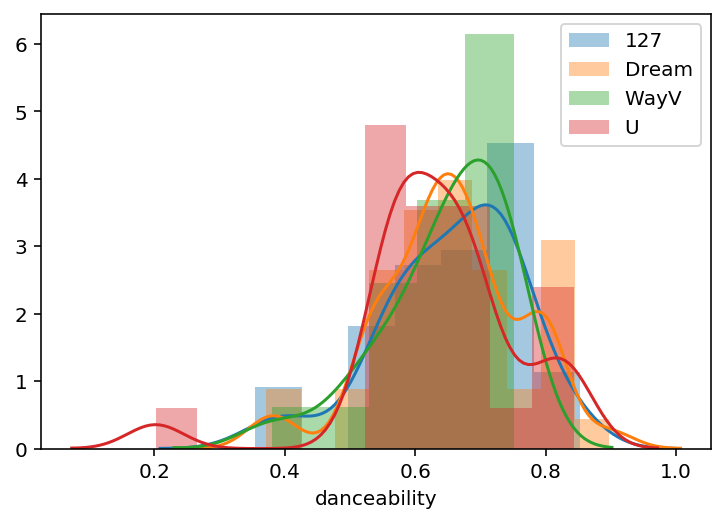

In [105]:
sns.distplot(n127['danceability'], label='127')
sns.distplot(dream['danceability'], label='Dream')
sns.distplot(wayv['danceability'], label='WayV')
sns.distplot(nu['danceability'], label='U')
plt.legend()
plt.show()

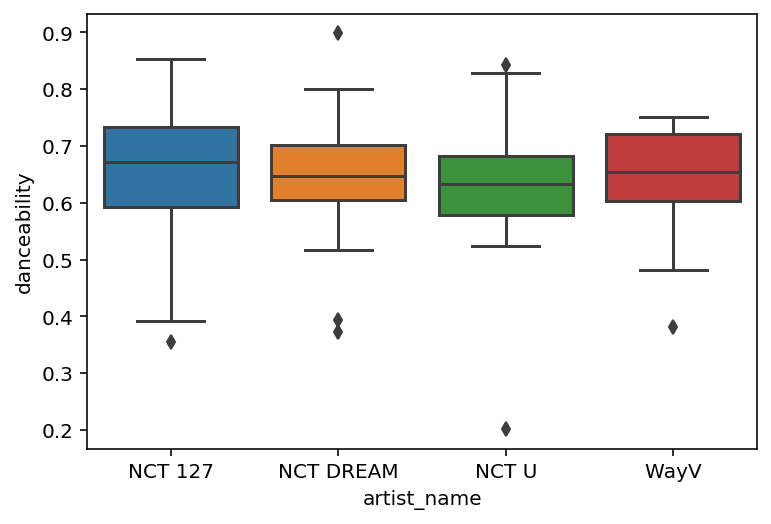

In [106]:
sns.boxplot(data=nct_df, x='artist_name', y='danceability')

In [107]:
nct_df.groupby(by='artist_name')['danceability'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,0.656806,0.107168,0.355,0.853
NCT DREAM,0.652977,0.109197,0.372,0.898
NCT U,0.636731,0.126189,0.202,0.843
WayV,0.646682,0.096440,0.381,0.751


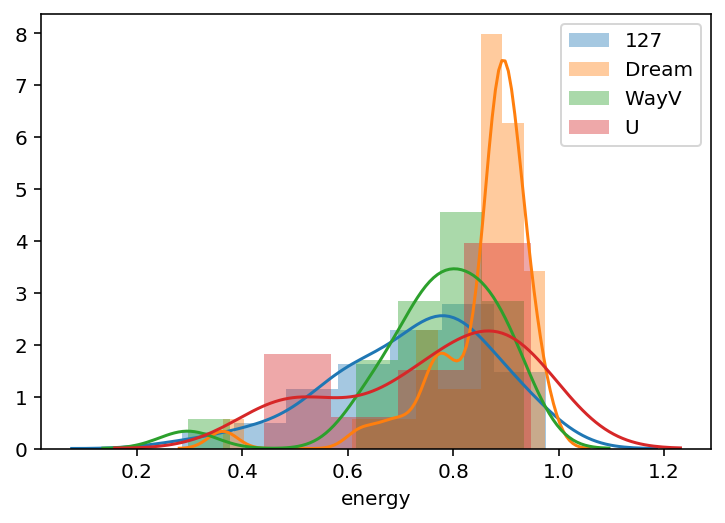

In [108]:
sns.distplot(n127['energy'], label='127')
sns.distplot(dream['energy'], label='Dream')
sns.distplot(wayv['energy'], label='WayV')
sns.distplot(nu['energy'], label='U')
plt.legend()
plt.show()

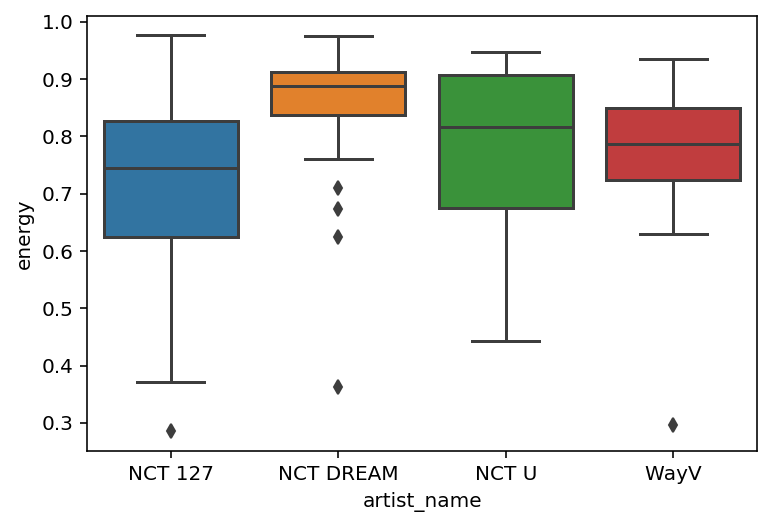

In [109]:
sns.boxplot(data=nct_df, x='artist_name', y='energy')

In [110]:
nct_df.groupby(by='artist_name')['energy'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,0.722355,0.151584,0.286,0.976
NCT DREAM,0.854116,0.107797,0.363,0.975
NCT U,0.760615,0.171638,0.442,0.947
WayV,0.770500,0.136660,0.296,0.935


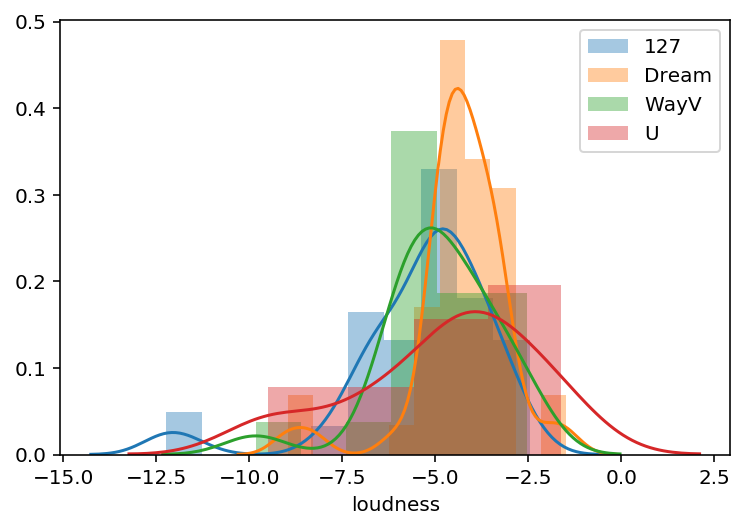

In [111]:
sns.distplot(n127['loudness'], label='127')
sns.distplot(dream['loudness'], label='Dream')
sns.distplot(wayv['loudness'], label='WayV')
sns.distplot(nu['loudness'], label='U')
plt.legend()
plt.show()

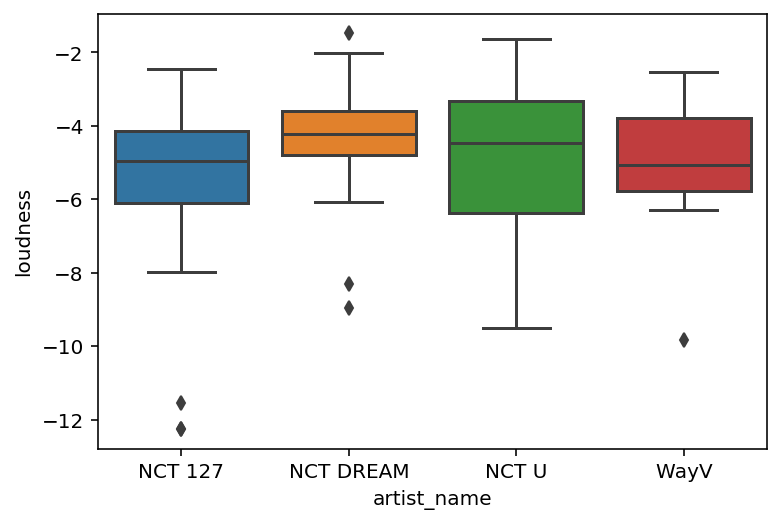

In [112]:
sns.boxplot(data=nct_df, x='artist_name', y='loudness')

In [113]:
nct_df.groupby(by='artist_name')['loudness'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,-5.358984,1.968933,-12.253,-2.462
NCT DREAM,-4.307721,1.288663,-8.973,-1.483
NCT U,-4.767846,2.399491,-9.507,-1.629
WayV,-4.885455,1.579075,-9.830,-2.537


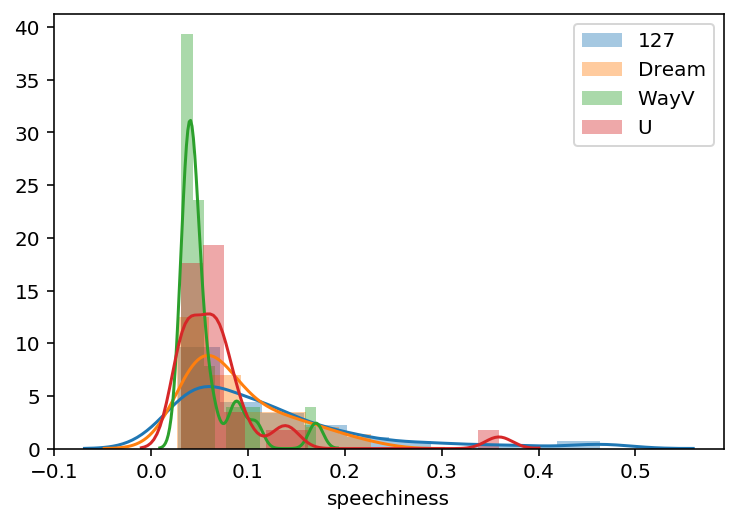

In [114]:
sns.distplot(n127['speechiness'], label='127')
sns.distplot(dream['speechiness'], label='Dream')
sns.distplot(wayv['speechiness'], label='WayV')
sns.distplot(nu['speechiness'], label='U')
plt.legend()
plt.show()

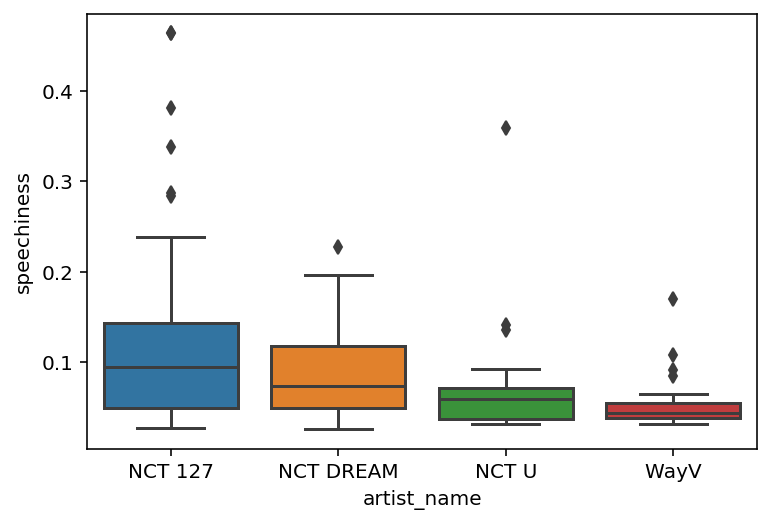

In [115]:
sns.boxplot(data=nct_df, x='artist_name', y='speechiness')

In [116]:
nct_df.groupby(by='artist_name')['speechiness'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,0.121084,0.100510,0.0277,0.463
NCT DREAM,0.087963,0.049941,0.0263,0.227
NCT U,0.073227,0.065251,0.0312,0.359
WayV,0.055650,0.032463,0.0312,0.170


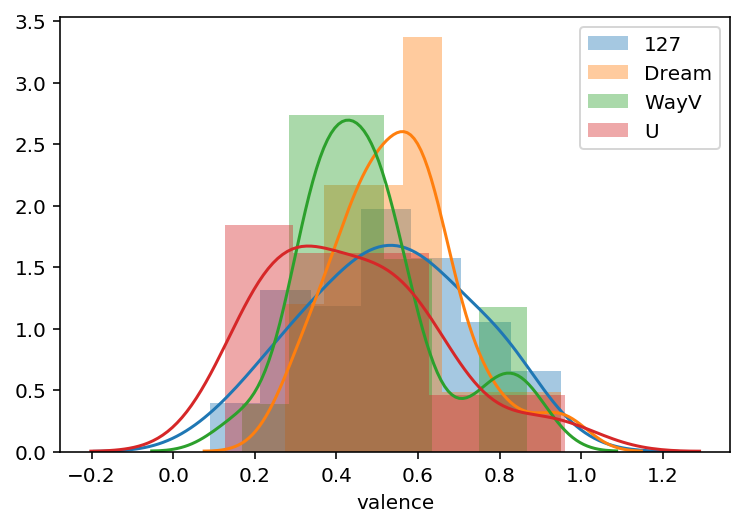

In [117]:
sns.distplot(n127['valence'], label='127')
sns.distplot(dream['valence'], label='Dream')
sns.distplot(wayv['valence'], label='WayV')
sns.distplot(nu['valence'], label='U')
plt.legend()
plt.show()

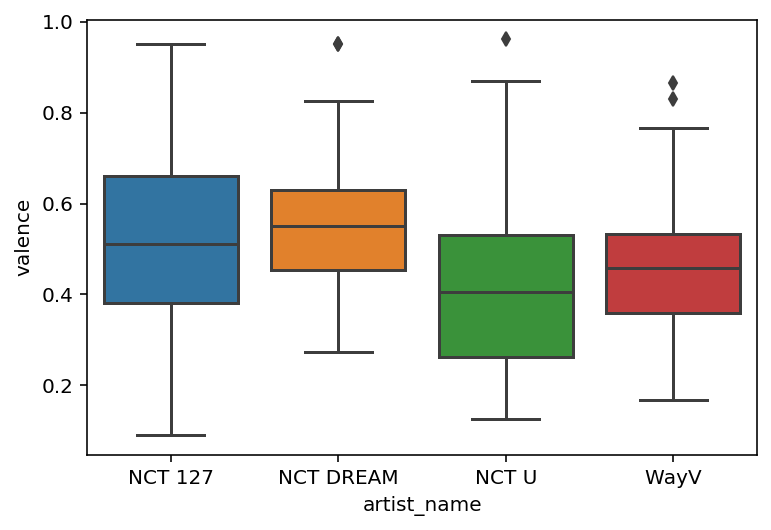

In [118]:
sns.boxplot(data=nct_df, x='artist_name', y='valence')

In [119]:
nct_df.groupby(by='artist_name')['valence'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,0.527423,0.204299,0.0912,0.950
NCT DREAM,0.552581,0.153072,0.2730,0.950
NCT U,0.437423,0.210059,0.1270,0.961
WayV,0.478409,0.170454,0.1680,0.866


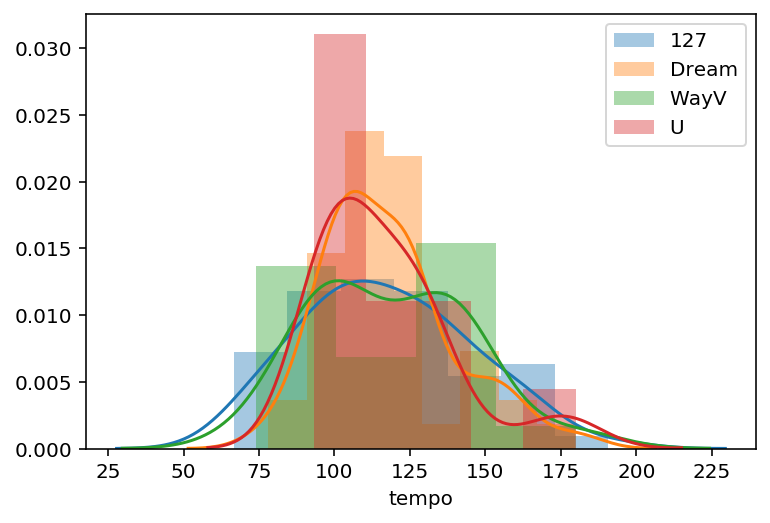

In [120]:
sns.distplot(n127['tempo'], label='127')
sns.distplot(dream['tempo'], label='Dream')
sns.distplot(wayv['tempo'], label='WayV')
sns.distplot(nu['tempo'], label='U')
plt.legend()
plt.show()

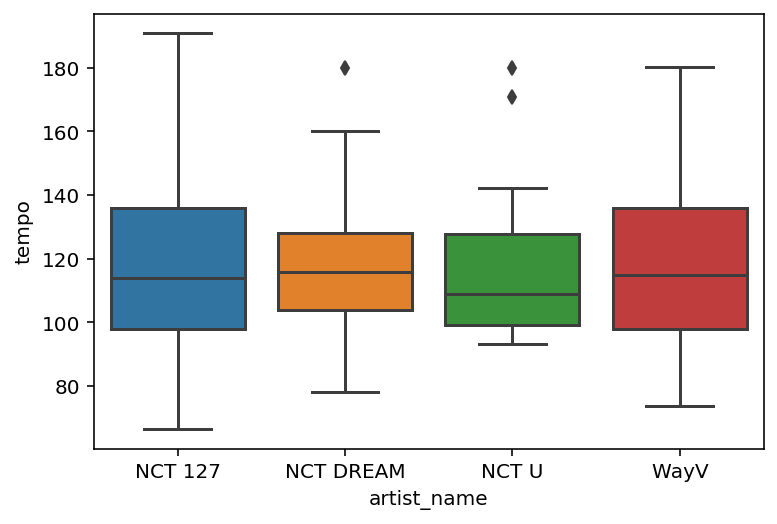

In [121]:
sns.boxplot(data=nct_df, x='artist_name', y='tempo')

In [122]:
nct_df.groupby(by='artist_name')['tempo'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
artist_name,,,,
NCT 127,117.392984,27.841995,66.536,190.763
NCT DREAM,117.799419,21.555275,78.090,179.823
NCT U,116.575077,22.187334,93.126,179.925
WayV,118.594455,25.804526,73.828,180.105
